In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rand
import seaborn as sns
from collections import Counter as Ct

num_uniq = 7

# Game Simulation

In [2]:
class Game():
    def __init__(self, forg1 = 0, forg2 = 0):
        self.num_uniq = num_uniq
        
        # board[i] % num_uniq represents the unique card number (image on card)
        # board[i] // num_uniq represents the instance number of that image (0th Cow, 1st Cow)
        # board[i] == -1 if card has already been matched.
        
        self.board = list(range(self.num_uniq * 2))
        rand.shuffle(self.board)

        self.scores = [0, 0]
        self.toMove = 0 # 0 or 1, which character is about to move
        self.flip = 1 # 1 or 2, what # card we are opening next
        self.flipped = None
        self.flipped_i = None
        self.round = 0
        
        self.memories = [
            [-1 for _ in range(self.num_uniq * 2)], # -1 is don't know/sremember, -2 is card removed,
            [-1 for _ in range(self.num_uniq * 2)], # otherwise unique card number
        ]
        
        self.forget = [forg1, forg2] # 0 is perfect recall, 1 is perfect forgetfulness
    
    def check_known_match(self):
        move1 = None
        move2 = None
        mem = self.memories[self.toMove]
        for i in range(num_uniq * 2):
            for j in range(i+1, num_uniq * 2):
                if not(mem[i] < 0 or mem[j] < 0):
                    if mem[i] % num_uniq == mem[j] % num_uniq: # match in memory
                        move1 = i
                        move2 = j
                        break

        return move1, move2
    
    def choose_unknown_card(self):
        unknown = []
        mem = self.memories[self.toMove]
        
        for i in range(len(mem)):
            if mem[i] == -1:
                unknown.append(i)
        return rand.choice(unknown)
        
    def flip_card(self, index):
        card_value = self.board[index]
        
        # both players learn the card
        for p in range(2):
            self.memories[p][index] = card_value
            
        if self.flip == 1: # 1st flip
            self.flipped = card_value
            self.flipped_i = index
            
        else: # 2nd flip
            if card_value != self.flipped and card_value%num_uniq == self.flipped%num_uniq: # match
                # remove cards from the board
                self.board[self.flipped_i] = -1
                self.board[index] = -1
                
                for p in range(2):
                    self.memories[p][self.flipped_i] = -2
                    self.memories[p][index] = -2
            
                # update score
                self.scores[self.toMove] += 1
            
            else: # no match
                self.toMove = (self.toMove + 1) % 2
            
            self.round += 1
            
        self.flip = 1 if self.flip == 2 else 2
        
    def roll_forget(self):
        for p in range(2):
            for i in range(len(self.memories[p])):
                if rand.random() < self.forget[p] and self.memories[p][i] != -2: # can't forget cards that were physically removed
                    self.memories[p][i] = -1
        
    def is_game_over(self):
        return all([x == -1 for x in self.board])

# Simple Game Simulation

In [3]:
repetitions = 10000
p1scs = []

for rep in range(repetitions):
    g = Game()
    while not g.is_game_over():

        m1, m2 = g.check_known_match()
        if not m1 is None:
            g.flip_card(m1)
            g.flip_card(m2)

        else:
            card = g.choose_unknown_card()
            g.flip_card(card)
            m1, m2 = g.check_known_match()
            if m1 or m2:
                if m1 == card:
                    g.flip_card(m2)
                else:
                    g.flip_card(m1)
            else:
                card = g.choose_unknown_card()
                g.flip_card(card)

    p1scs.append(g.scores[0])

Player 1 WR: 57.0 % after 10000 repetitions.


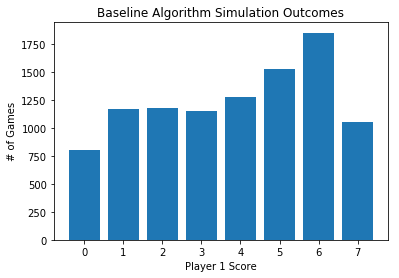

In [4]:
counts = Ct(p1scs)

wins = counts[4] + counts[5] + counts[6] + counts[7]
print("Player 1 WR:", round(wins/repetitions * 100, 1), "% after", repetitions, "repetitions.")

x = list(range(num_uniq + 1))
y = [counts[i] for i in x]

plt.bar(x,y)
plt.title("Baseline Algorithm Simulation Outcomes")
plt.xlabel("Player 1 Score")
plt.ylabel("# of Games")
plt.show()

# 2nd Player Stall Strategy Simulation

WIP: distinction between 1a and 1b, improve branching logic.

In [6]:
repetitions = 50_000
p1s = [
    [],[],[]
]
for strat in range(3): # strategy code
    for rep in range(repetitions):
        g = Game()
        while not g.is_game_over():
            
            if g.round == 1 and not (1 in g.scores): # broken 2nd player strat??
                mem = g.memories[g.toMove]
                knowns = []
                for i in range(num_uniq * 2):
                    if not mem[i] < 0:
                        knowns.append(i)
                        
                if strat == 
                # flip 1
                if strat > 0 and len(knowns) > 0:
                    g.flip_card(knowns[0])
                else:
                    g.flip_card(g.choose_unknown_card())
                    
                # flip 2
                if strat > 1 and len(knowns) > 1:
                    g.flip_card(knowns[1])
                else:
                    g.flip_card(g.choose_unknown_card())

            else: # regular play
                m1, m2 = g.check_known_match()
                if not m1 is None:
                    g.flip_card(m1)
                    g.flip_card(m2)

                else:
                    card = g.choose_unknown_card()
                    g.flip_card(card)
                    m1, m2 = g.check_known_match()
                    if m1 or m2:
                        if m1 == card:
                            g.flip_card(m2)
                        else:
                            g.flip_card(m1)
                    else:
                        card = g.choose_unknown_card()
                        g.flip_card(card)
            
            g.roll_forget()

        p1s[strat].append(g.scores[0])

In [7]:
for ch in range(3):
    counts = Ct(p1s[ch])
    win = counts[4] + counts[5] + counts[6] + counts[7]
    print("Strat ", ch, " ", win / repetitions)

Strat  0   0.59302
Strat  1   0.53118
Strat  2   0.4233


# Effect of Memory Skill on Win Rate

In [8]:
forget_count = 7
forget_step = 1 / forget_count
forgets = np.mgrid[0:1+forget_step:forget_step, 0:1+forget_step:forget_step] # grid of lambda values. first dimension is player.
forgets

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
         0.14285714, 0.14285714, 0.14285714],
        [0.28571429, 0.28571429, 0.28571429, 0.28571429, 0.28571429,
         0.28571429, 0.28571429, 0.28571429],
        [0.42857143, 0.42857143, 0.42857143, 0.42857143, 0.42857143,
         0.42857143, 0.42857143, 0.42857143],
        [0.57142857, 0.57142857, 0.57142857, 0.57142857, 0.57142857,
         0.57142857, 0.57142857, 0.57142857],
        [0.71428571, 0.71428571, 0.71428571, 0.71428571, 0.71428571,
         0.71428571, 0.71428571, 0.71428571],
        [0.85714286, 0.85714286, 0.85714286, 0.85714286, 0.85714286,
         0.85714286, 0.85714286, 0.85714286],
        [1.        , 1.        , 1.        , 1.        , 1.        ,
         1.        , 1.        , 1.        ]],

       [[0.        , 0.14285714, 0.28571429, 0.42857143, 0.57142857,
         

In [9]:
repetitions = 1000
p1wins = np.zeros((forget_count + 1, forget_count + 1))
for i in range(forget_count + 1):
    for j in range(forget_count + 1):
        for rep in range(repetitions):
            g = Game(forgets[0][i][j], forgets[1][i][j])

            while not g.is_game_over():

                m1, m2 = g.check_known_match()
                if not m1 is None:
                    g.flip_card(m1)
                    g.flip_card(m2)

                else:
                    card = g.choose_unknown_card()
                    g.flip_card(card)
                    m1, m2 = g.check_known_match()
                    if m1 or m2:
                        if m1 == card:
                            g.flip_card(m2)
                        else:
                            g.flip_card(m1)
                    else:
                        card = g.choose_unknown_card()
                        g.flip_card(card)

                g.roll_forget()

            if g.scores[0] > num_uniq / 2:
                p1wins[i][j] += 1

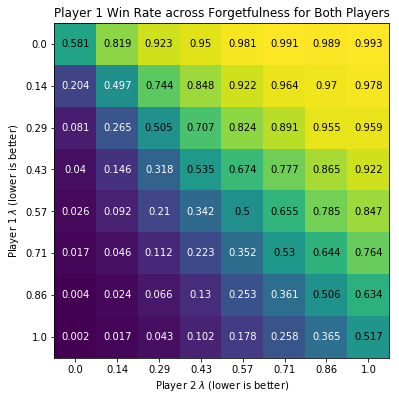

In [10]:
p1wr = np.array(p1wins) / repetitions

forget_ticks = [round(x,2) for x in np.linspace(0,1,forget_count+1)]

fig, ax = plt.subplots(figsize = (6,9))
im = ax.imshow(p1wins)

plt.ylabel("Player 1 $\lambda$ (lower is better)")
plt.xlabel("Player 2 $\lambda$ (lower is better)")

plt.title("Player 1 Win Rate across Forgetfulness for Both Players")

ax.set_xticks(np.arange(len(forget_ticks)))
ax.set_yticks(np.arange(len(forget_ticks)))

ax.set_xticklabels(forget_ticks)
ax.set_yticklabels(forget_ticks)

for i in range(len(forget_ticks)):
    for j in range(len(forget_ticks)):
        if p1wins[i,j] / repetitions < 0.5:
            color = "w"
        else:
            color = "k"
        text = ax.text(j, i, p1wr[i, j], ha="center", va="center", color = color)

plt.show()